### Task 2
Find secret message within 3 files. 

The following steps will be taken to solve the task 2. 

1. visualize frequencies of each audio file with spectograms
2. identify file that has abnormalities
3. create detailed spectogram for identified file to find a range of frequencies of secret message location
4. narrow down range of frequencies
5. manually check narrowed down range and transform audio
6. display result of findings

#### 1. Visualize frequencies of each audio file with spectograms:

In [1]:
# import libraries
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import thinkdsp
import thinkplot

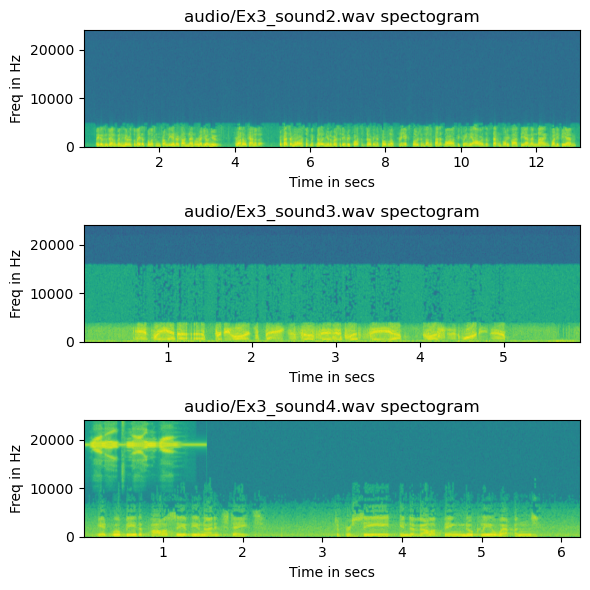

In [2]:
# files to work with
audio = ["audio/Ex3_sound2.wav", 
         "audio/Ex3_sound3.wav", 
         "audio/Ex3_sound4.wav"]

# handles subplots for spectrograms
subplots, axes = plt.subplots(len(audio), 1, figsize=(6, 6))

# check each file
for x, file in enumerate(audio):
    sample_rate, data = wavfile.read(file) # read file

    # spectrogram plots
    ax = axes[x]
    spec = ax.specgram(data, Fs=sample_rate)
    ax.set_title(f"{file} spectogram")
    ax.set_xlabel("Time in secs")
    ax.set_ylabel("Freq in Hz")
    ax.set_ylim(0, sample_rate / 2) 

plt.tight_layout()
plt.show()

#### 2. Identify file that has abnormalities:
The Ex3_sound4.wav shows some data around 20,000 which is considered an ultrasonic frequency range. Let's play the audio. 

In [3]:
# play original audio
wave = thinkdsp.read_wave('audio/Ex3_sound4.wav')
wave.unbias()
wave.normalize()
wave.make_audio()

The 4-numbered code is not heard in the original audio file. 

#### 3. Create detailed spectogram for identified file to find a range of frequencies of secret message location:

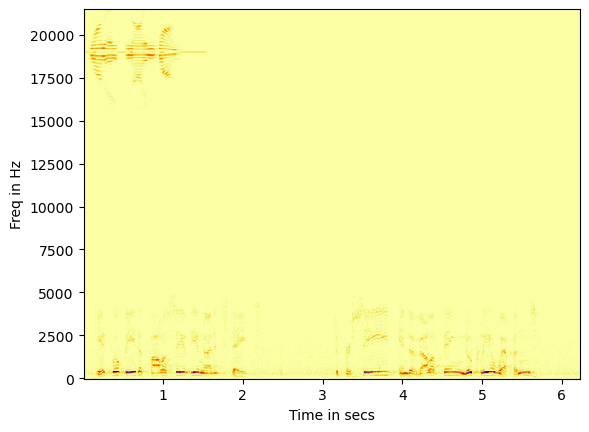

In [4]:
sound4_spectrogram = wave.make_spectrogram(seg_length=1024)  
sound4_spectrogram.plot(high=21500) 

plt.xlabel('Time in secs')
plt.ylabel('Freq in Hz')
plt.show()

The sound4 spectrogram shows some data between 17,500 and 21,000 range of frequencies. It's a large range. I will "zoom in" on thereof range to see if there is something else visible. 

#### 4. Narrow down range of frequencies:

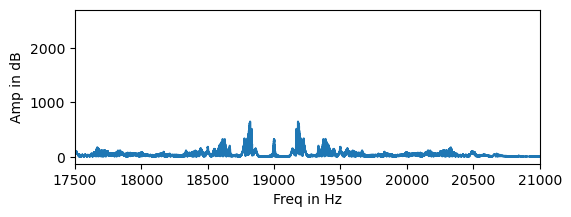

In [5]:
# spectrum for sound4 audio
sound4_spectrum = wave.make_spectrum()

# plot from 17,500 to 21,000 frequencies 
plt.figure(figsize=(6, 2))
plt.plot(sound4_spectrum.fs, abs(sound4_spectrum.hs))
plt.xlim(17500, 21000)  

plt.xlabel('Freq in Hz')
plt.ylabel('Amp in dB')
plt.show()

The above plot narrow's down the range to 18,500 and 19,600. This is where I will be manually picking frequencies and checking the audio. 

#### 5. Manually check narrowed down range and transform audio to human detectable frequency

In [6]:
# setup low and high pass filters 
def pass_filters(spectrum, cutoff_low_freq, cutoff_high_freq):
    spectrum.high_pass(cutoff_low_freq)
    spectrum.low_pass(cutoff_high_freq)

# setup transform wave to human understandable frequency
def transform_wave(freq, wave):
    frequency_shifter = thinkdsp.CosSignal(freq=freq)
    freq_shift_wave = frequency_shifter.make_wave(duration=wave.duration, start=0, framerate=wave.framerate)
    return wave * freq_shift_wave

# setup low pass filter
def low_pass_filter(spectrum, low_pass_cutoff_freq):
    spectrum.low_pass(low_pass_cutoff_freq)

# spectrum wave
def spectrum_wave(spectrum):
    return spectrum.make_wave()

# makes spectrum
def make_spectrum(wave):
    return wave.make_spectrum()

# make spectrum of wave
spectrum = make_spectrum(wave)

# use pass filters
pass_filters(spectrum, cutoff_low_freq=20000, cutoff_high_freq=23000)
pass_filters_wave = spectrum_wave(spectrum)

# transform ultrasonic frequency to human frequency 
freq = 19000
transformed_wave = transform_wave(freq, wave)
transformed_spectrum = make_spectrum(transformed_wave)

# use low-pass filter with specified frequency
low_pass_cutoff_freq = 4000
low_pass_filter(transformed_spectrum, low_pass_cutoff_freq)

# create transformed wave 
transformed_wave = spectrum_wave(transformed_spectrum)

#### 6. Dislpay result of findings:
Secret message is a 4-numbered code: 1891

In [7]:
# audio with the secret message
transformed_wave.make_audio()

### References:

- https://colab.research.google.com/github/gened1080/amplitude-modulation/blob/master/Amplitude_Modulation_Fall_2020.ipynb
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
- https://www.geeksforgeeks.org/enumerate-in-python/
- https://github.com/AllenDowney/ThinkDSP
- https://en.wikipedia.org/wiki/Band-pass_filter
- https://github.com/AllenDowney/ThinkDSP/blob/master/code/chap09.ipynb
- https://en.wikipedia.org/wiki/Demodulation
- https://en.wikipedia.org/wiki/Low-pass_filter
- https://www.tutorialspoint.com/digital_signal_processing/index.htm
- https://docs.scipy.org/doc/scipy/reference/
- https://numpy.org/doc/